In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pandas.read_csv('smart_city_citizen_activity.csv')
print(data)

     Citizen_ID  Age  Gender Mode_of_Transport  Work_Hours  Shopping_Hours  \
0          1001   56  Female           Walking           5               2   
1          1002   69    Male           Bicycle           0               2   
2          1003   46    Male              Bike           0               4   
3          1004   32    Male               Car           7               2   
4          1005   60    Male           Walking           3               3   
..          ...  ...     ...               ...         ...             ...   
995        1996   60    Male               Car           2               2   
996        1997   64  Female           Walking           9               0   
997        1998   62  Female                EV           8               3   
998        1999   35  Female               Car           9               3   
999        2000   55    Male               Car           4               0   

     Entertainment_Hours  Home_Energy_Consumption_kWh  Charging

In [3]:
# General overview of the dataset
data_info = data.info()

# Number of rows and columns
num_rows, num_columns = data.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Citizen_ID                   1000 non-null   int64  
 1   Age                          1000 non-null   int64  
 2   Gender                       1000 non-null   object 
 3   Mode_of_Transport            1000 non-null   object 
 4   Work_Hours                   1000 non-null   int64  
 5   Shopping_Hours               1000 non-null   int64  
 6   Entertainment_Hours          1000 non-null   int64  
 7   Home_Energy_Consumption_kWh  1000 non-null   float64
 8   Charging_Station_Usage       1000 non-null   int64  
 9   Carbon_Footprint_kgCO2       1000 non-null   float64
 10  Steps_Walked                 1000 non-null   int64  
 11  Calories_Burned              1000 non-null   int64  
 12  Sleep_Hours                  1000 non-null   float64
 13  Social_Media_Hours 

In [4]:
# Finding if there are null values in the dataset
print(data.isnull().values.any())

False


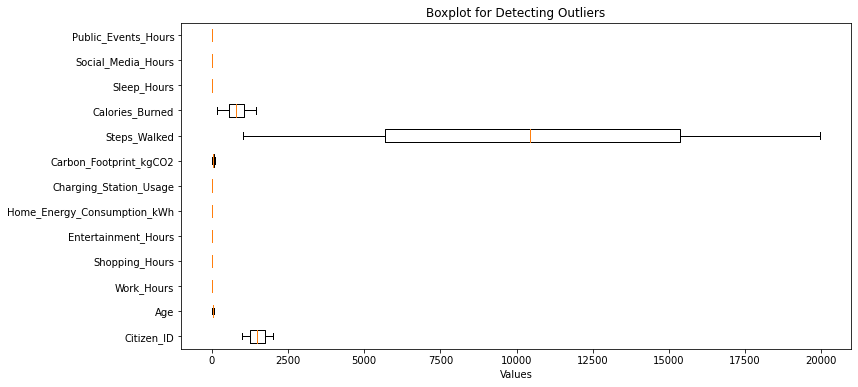

In [5]:
plt.figure(figsize=(12, 6))

# Create boxplot for numerical columns only
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Create the boxplot
plt.boxplot([data[col] for col in numeric_columns], vert=False)
plt.title("Boxplot for Detecting Outliers")
plt.xlabel("Values")
plt.yticks(range(1, len(numeric_columns) + 1), numeric_columns)  # Set y-ticks as column names

plt.show()

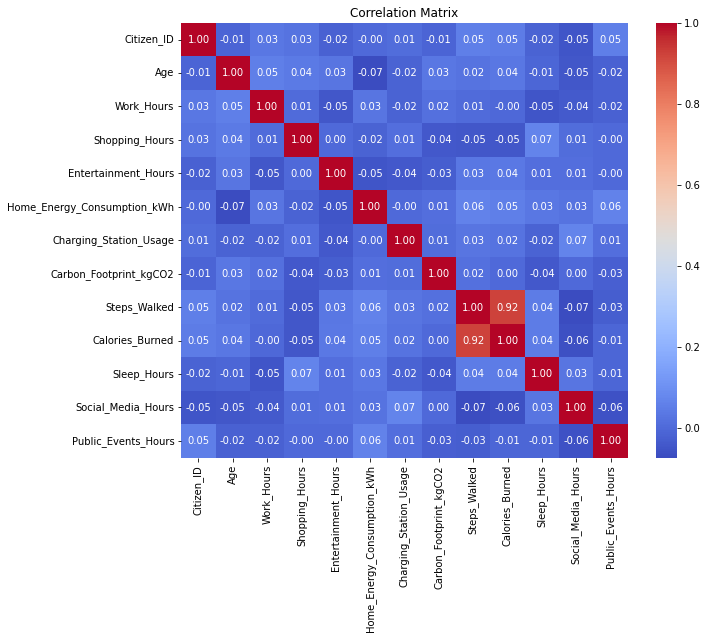

In [6]:
import seaborn as sns

correlation_matrix = data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [7]:
# Univariate Analysis: Basic Statistics
print("Basic statistics (mean, variance, etc.):")
print(data.describe())

Basic statistics (mean, variance, etc.):
        Citizen_ID         Age   Work_Hours  Shopping_Hours  \
count  1000.000000  1000.00000  1000.000000     1000.000000   
mean   1500.500000    43.81900     4.397000        2.024000   
std     288.819436    14.99103     2.870127        1.421071   
min    1001.000000    18.00000     0.000000        0.000000   
25%    1250.750000    31.00000     2.000000        1.000000   
50%    1500.500000    44.00000     4.000000        2.000000   
75%    1750.250000    56.00000     7.000000        3.000000   
max    2000.000000    69.00000     9.000000        4.000000   

       Entertainment_Hours  Home_Energy_Consumption_kWh  \
count          1000.000000                  1000.000000   
mean              1.532000                     5.996900   
std               1.102811                     2.302009   
min               0.000000                     2.000000   
25%               1.000000                     4.050000   
50%               2.000000           

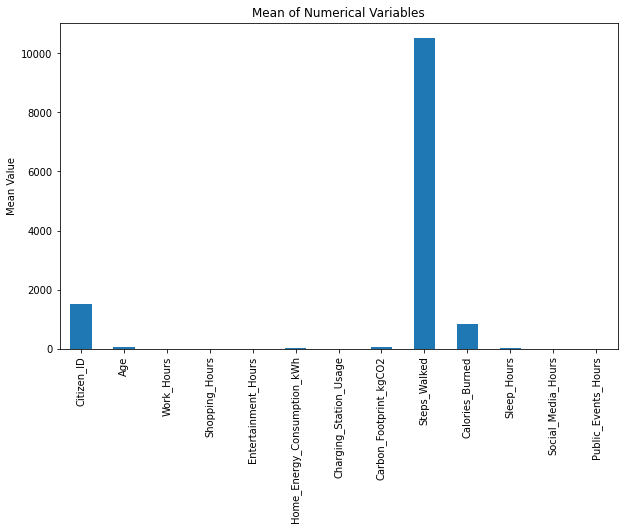

In [8]:
numerical_columns = data.select_dtypes(include=[np.number]).columns

# Bar chart for Mean value
data[numerical_columns].mean().plot(kind='bar', figsize=(10, 6), title='Mean of Numerical Variables')
plt.ylabel('Mean Value')
plt.show()

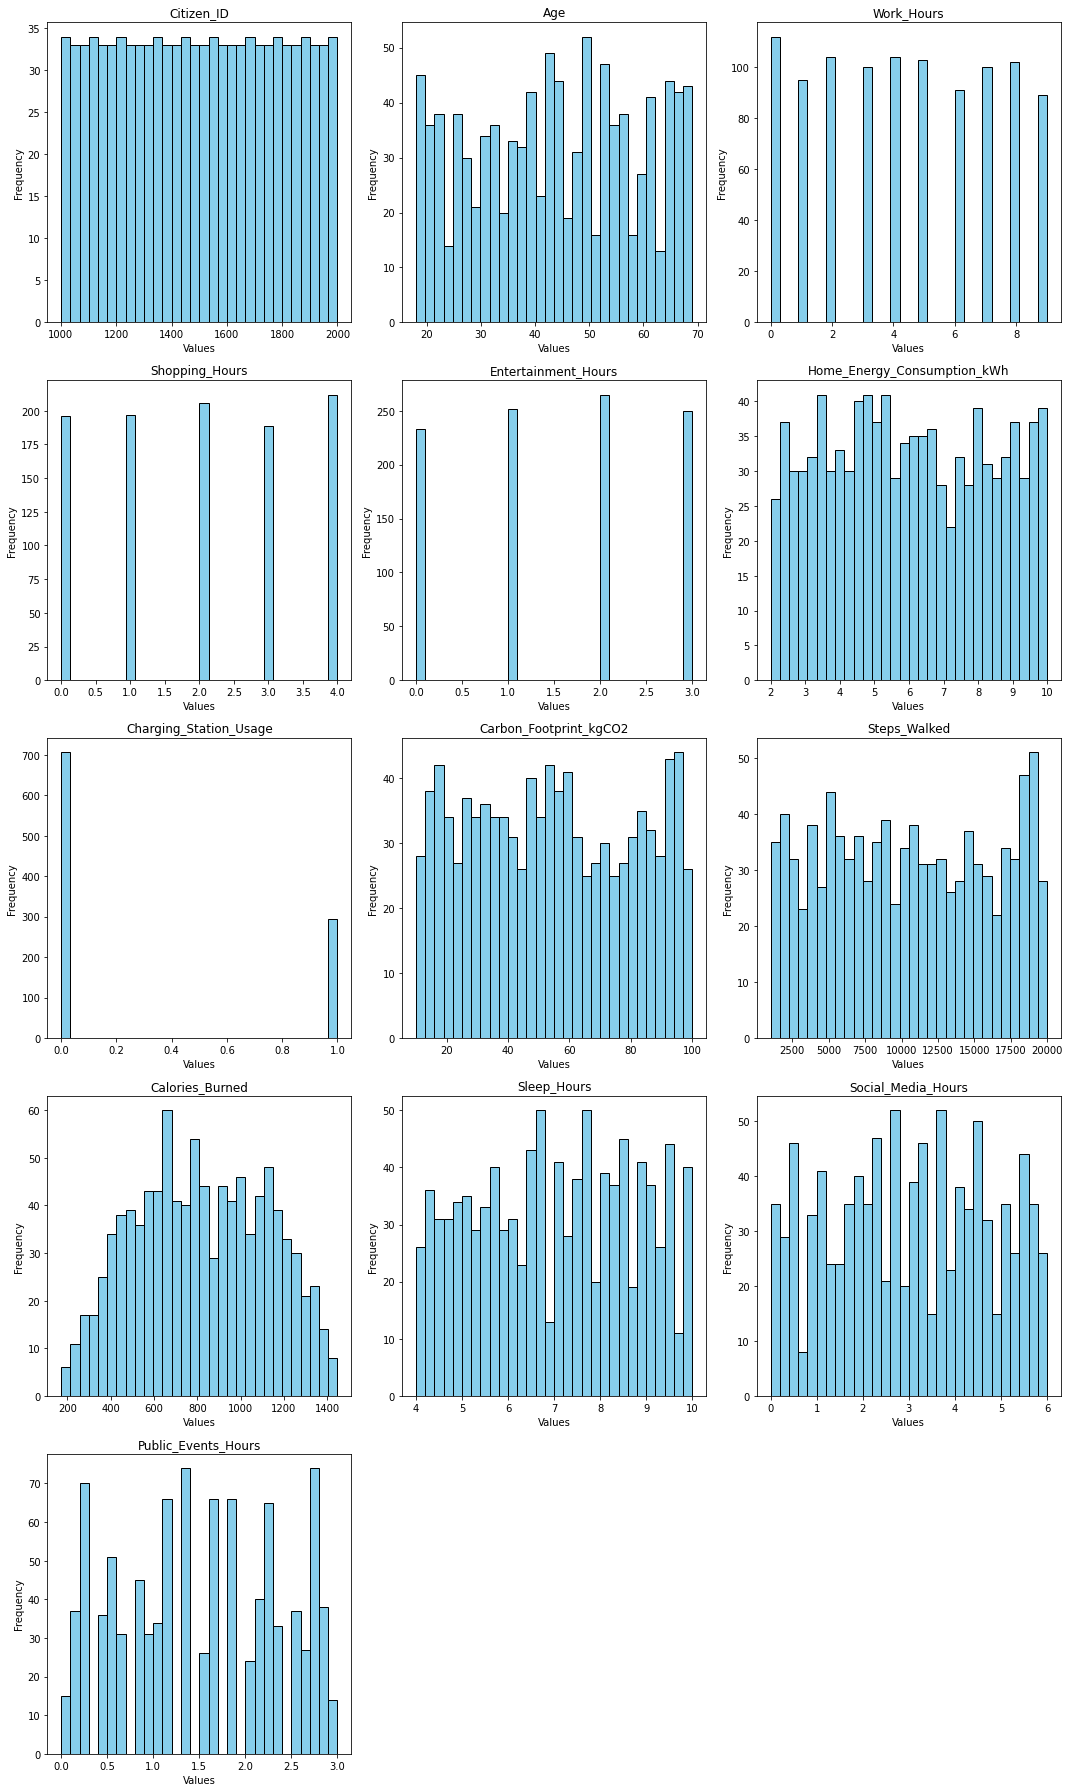

In [9]:
# Histogram: Dynamically set the layout based on the number of numerical columns
ncols = 3
nrows = (len(numerical_columns) // ncols) + (1 if len(numerical_columns) % ncols > 0 else 0)  # Calculate rows

# Create the subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*5))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Plot histograms and set titles
for i, column in enumerate(numerical_columns):
    axes[i].hist(data[column], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(column)  # Set the title of each subplot
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')

# If there are more subplots than columns, hide the empty axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [10]:
# Bivariate Analysis: Relationships between variables
# Covariance

numeric_data = data.select_dtypes(include=[np.number])

print(np.cov(numeric_data))

[[18517016.16769743  1921883.36678077  2056382.0246141  ...
  11211941.0351359   3182623.26706538 21987446.73089359]
 [ 1921883.36678077   264446.01634744   275408.99452244 ...
   1261247.83794423   451426.44359872  2340177.02091026]
 [ 2056382.0246141    275408.99452244   288775.8629641  ...
   1340037.7068109    474681.17512372  2497901.62973526]
 ...
 [11211941.0351359   1261247.83794423  1340037.7068109  ...
   6938242.3527641   2117431.61244295 13401893.63204807]
 [ 3182623.26706538   451426.44359872   474681.17512372 ...
   2117431.61244295   798581.97162436  3890810.15393846]
 [21987446.73089359  2340177.02091026  2497901.62973526 ...
  13401893.63204807  3890810.15393846 26161109.8640423 ]]


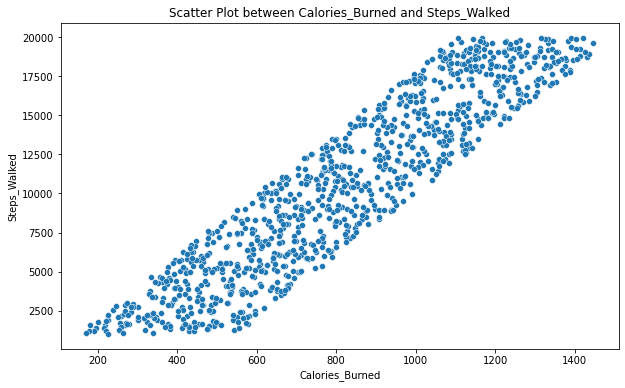

In [11]:
# Visualize Correlation between specific pairs
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Calories_Burned', y='Steps_Walked', data=data)
plt.title('Scatter Plot between Calories_Burned and Steps_Walked')
plt.show()

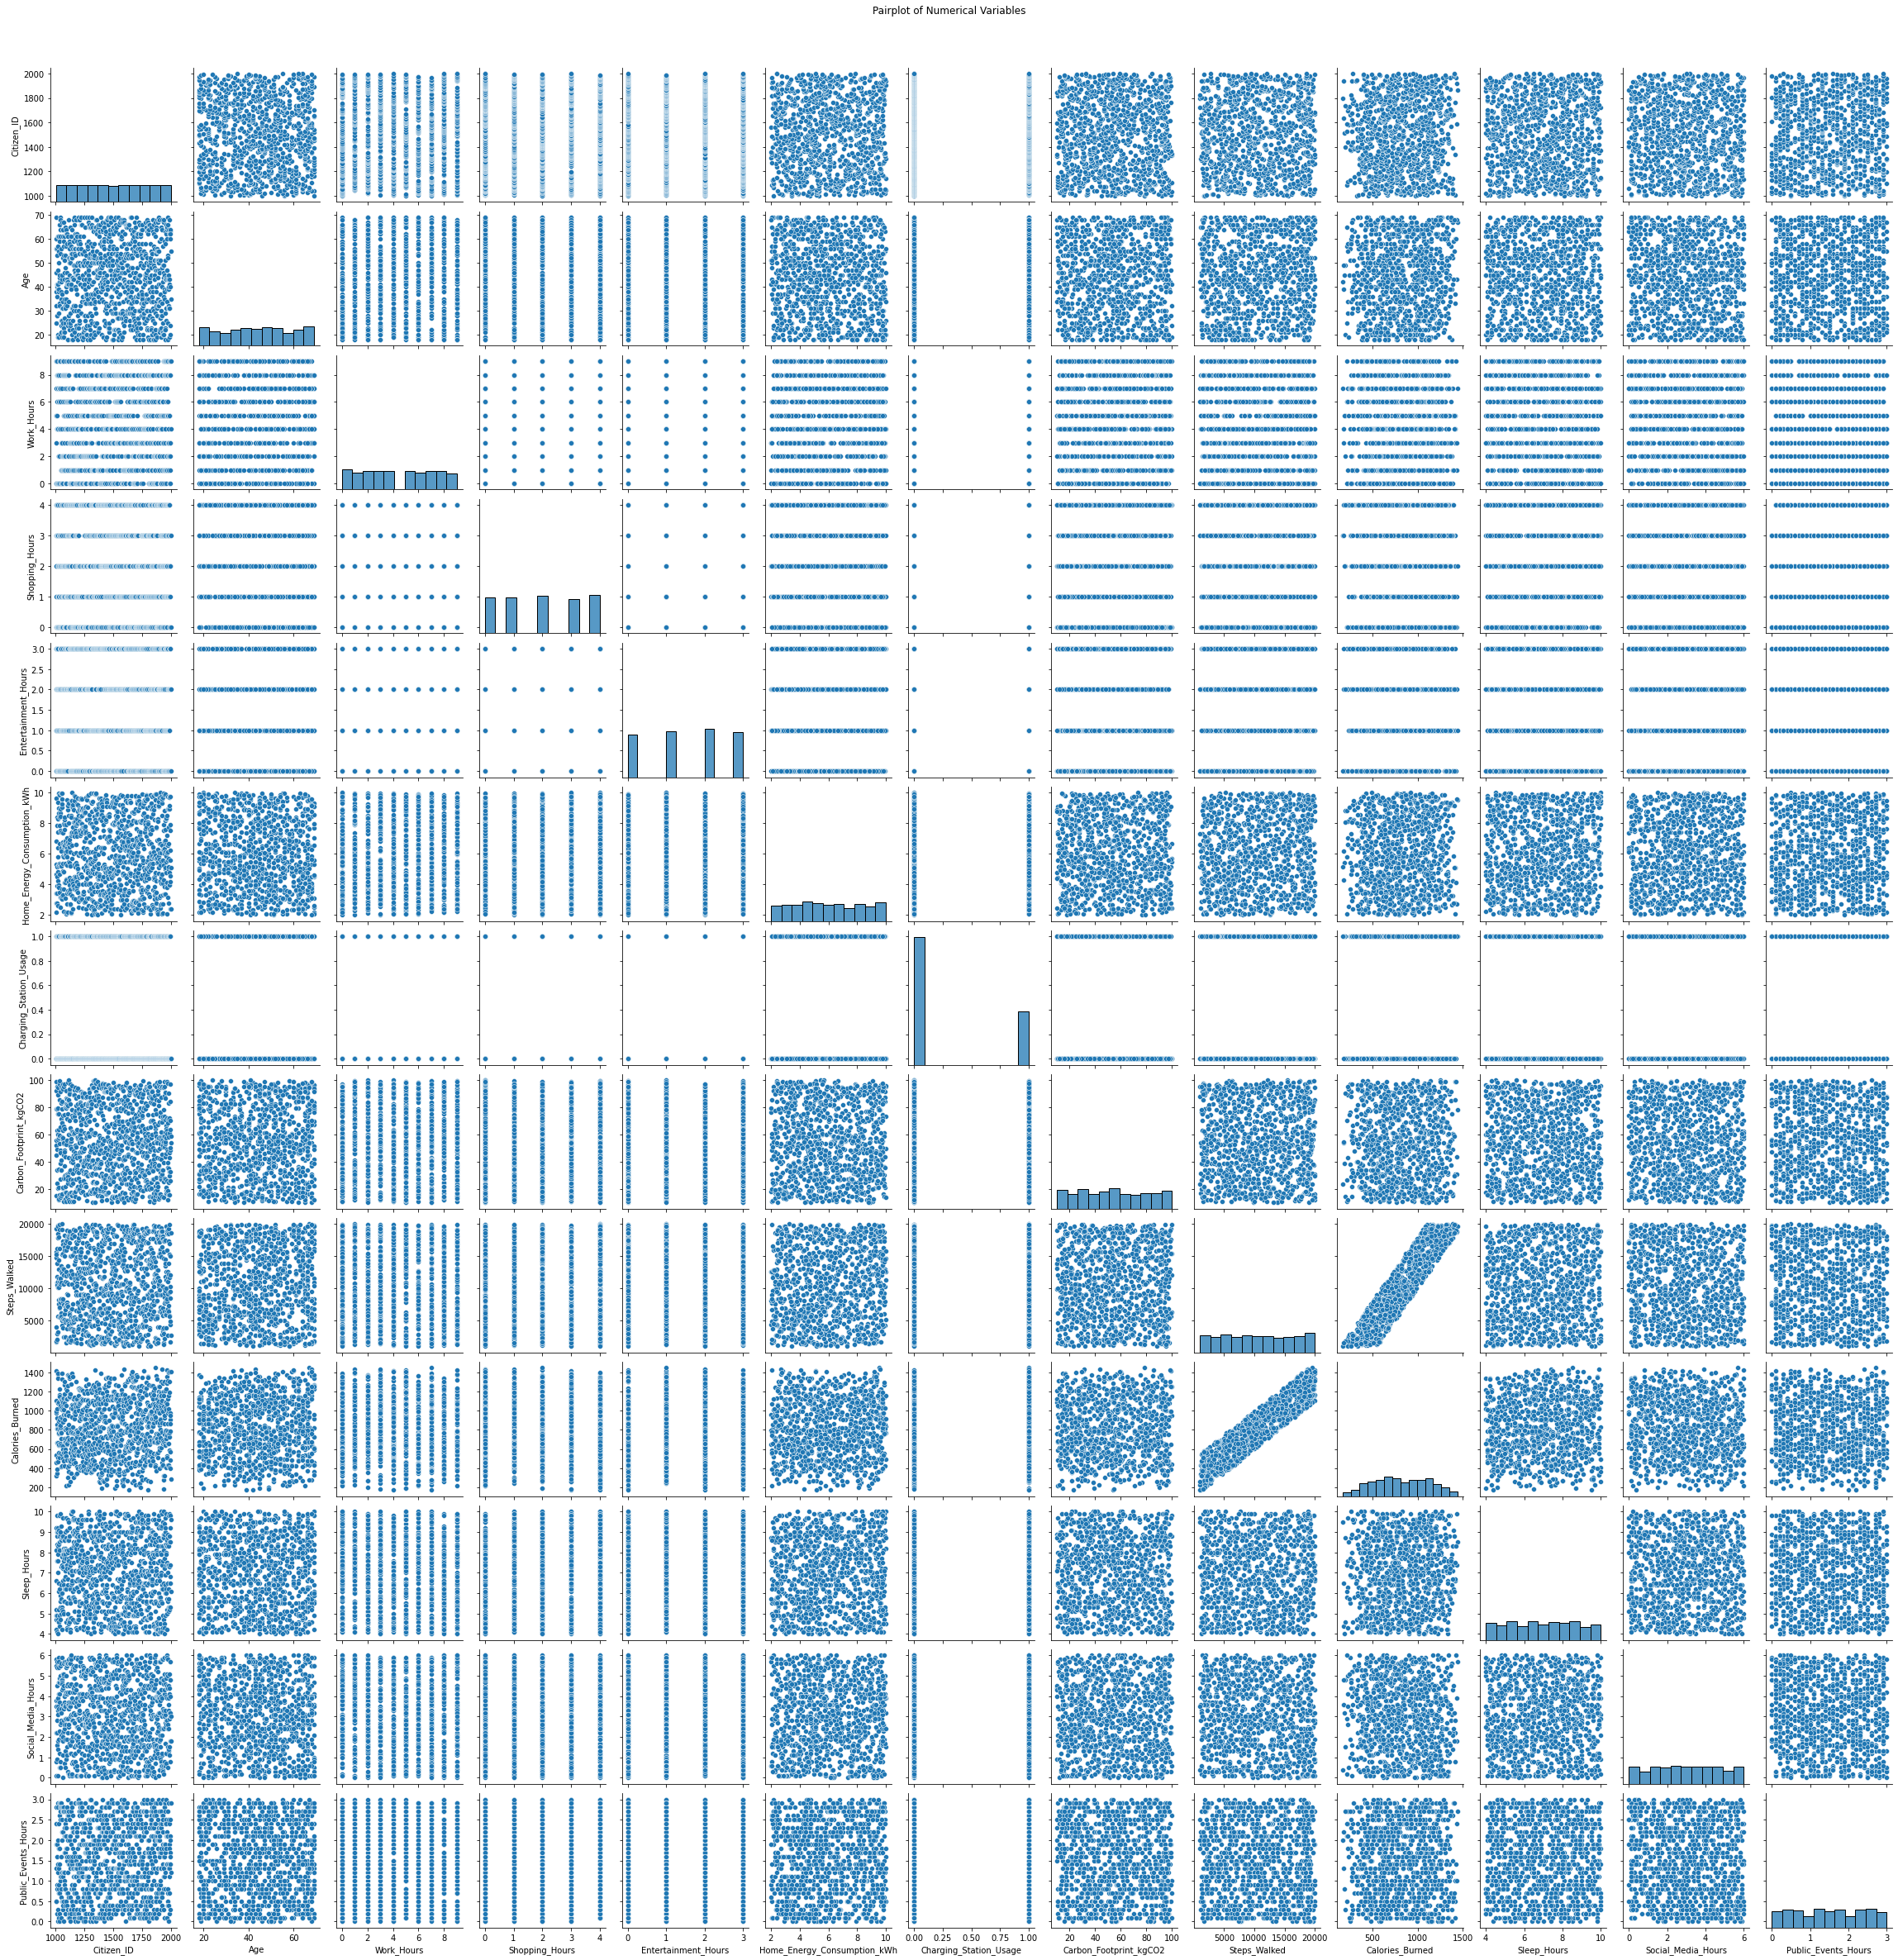

In [12]:
# Pairplot: to visualize the relationships between all numerical variables
sns.pairplot(data[numerical_columns])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()